In [2]:
#准备：合并7个文件
import pandas as pd
import os

# 设置CSV文件所在的文件夹路径
folder_path = 'C:/Users/32535/Desktop/data'

# 获取文件夹中所有CSV文件
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 读取并合并所有CSV文件
merged_data = pd.concat([pd.read_csv(os.path.join(folder_path, file)) for file in csv_files], ignore_index=True)

# 将合并后的数据保存为一个新的CSV文件
merged_data.to_csv('data.csv', index=False)

print("文件已成功合并并保存为 'data.csv'")


文件已成功合并并保存为 'data.csv'


国家分布：
country
United States           305788
Germany                 182659
China                    73011
United Kingdom           71606
France                   59570
Canada                   58600
Netherlands              52367
Czechia                  48122
Japan                    46553
Switzerland              38093
Australia                35746
Italy                    30671
Poland                   20002
New Zealand              18444
Spain                    14939
Austria                  11758
Sweden                    9851
Finland                   8815
Denmark                   7412
Bulgaria                  7357
Hungary                   7080
Belgium                   6628
Norway                    6004
India                     5689
United Arab Emirates      5264
Singapore                 5205
Brazil                    5022
Hong Kong                 4767
Malaysia                  4538
Pakistan                  4462
Indonesia                 4248
Russia                   

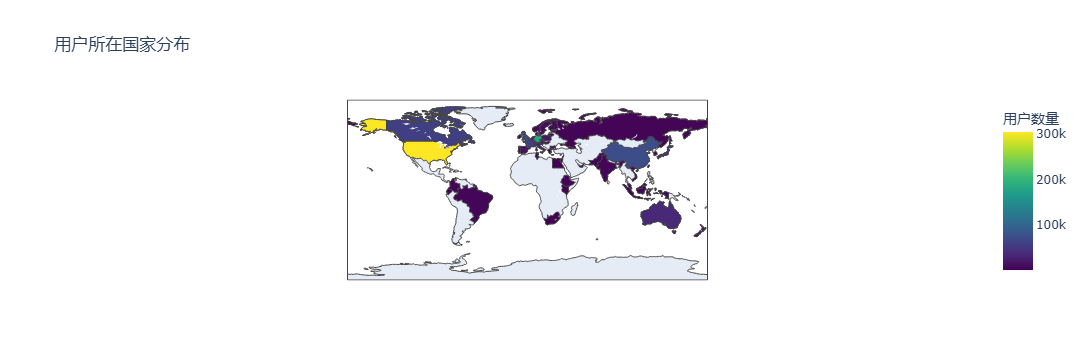

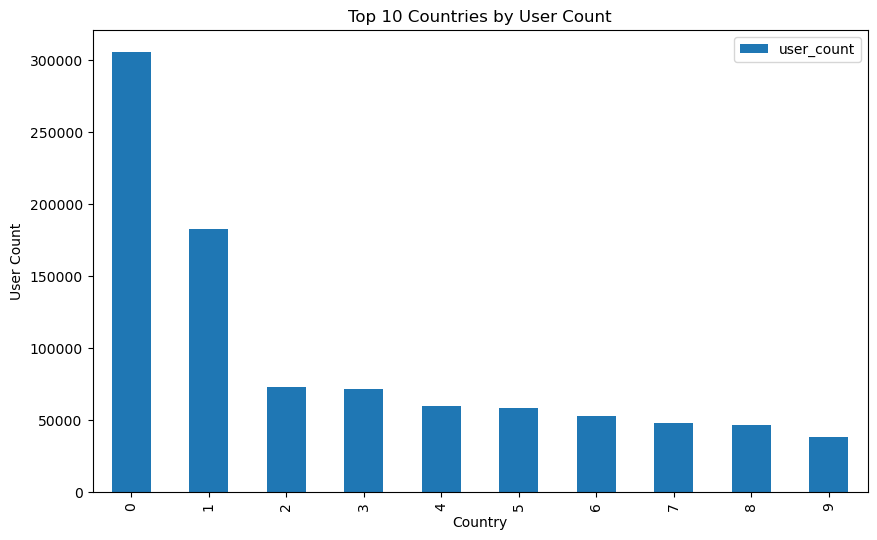


主要城市分布：
location
Germany          107747
Prague            37757
Japan             26986
Palo Alto, CA     19215
UK                17789
NYC               16381
San Francisco     16271
Paris, France     16021
Switzerland       15555
Houston, TX       15449
Name: count, dtype: int64


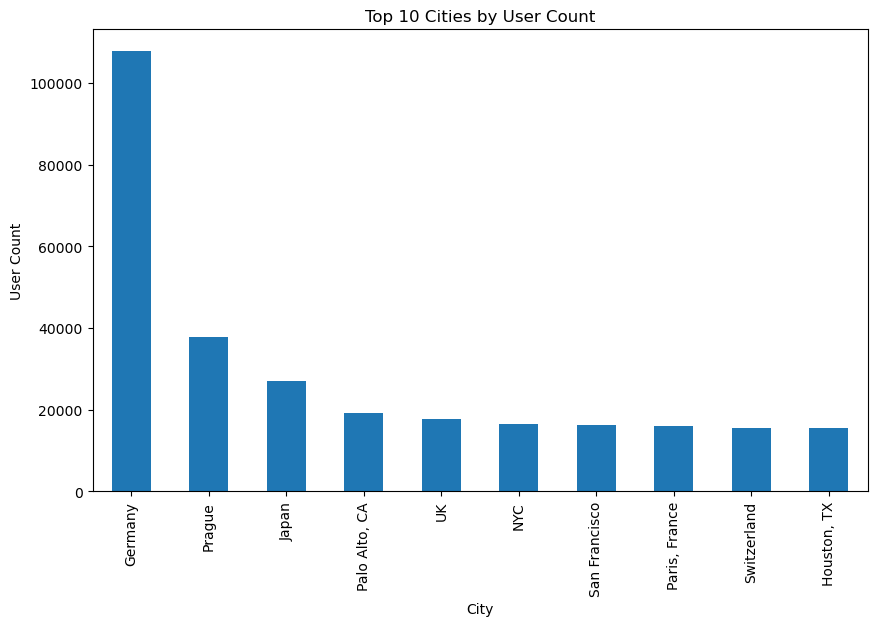


时区分布：
timezone
-10    679868
-11    614908
Name: count, dtype: int64


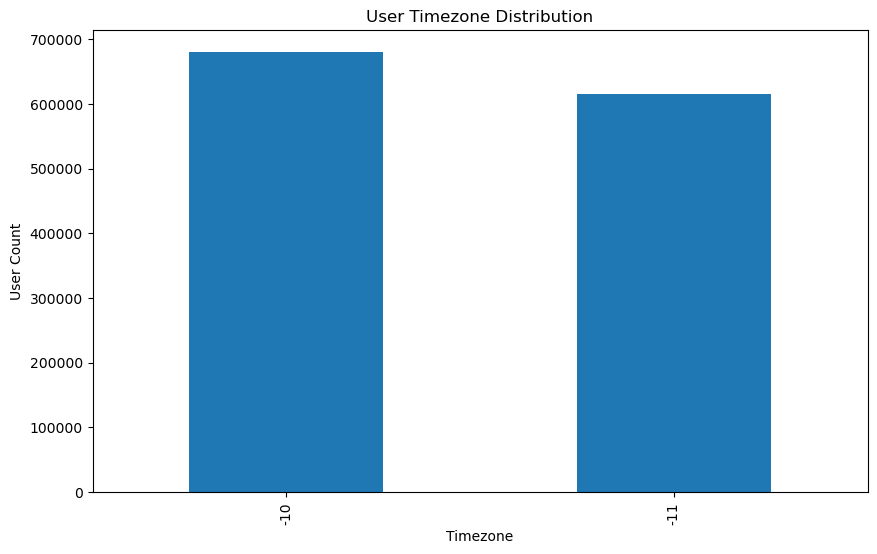

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv('C:/Users/32535/Desktop/data.csv')

#人口统计分析
# 国家和地区分布分析
country_dist = data['country'].value_counts()
location_dist = data['location'].value_counts()

print("国家分布：")
print(country_dist)
print("\n地区分布：")
print(location_dist)

country_dist = data['country'].value_counts().reset_index()
country_dist.columns = ['country', 'user_count']

# 可视化国家分布：在地图上标注
fig = px.choropleth(country_dist,
                    locations='country',  
                    locationmode='country names', 
                    color='user_count',
                    hover_name='country',  
                    color_continuous_scale='Viridis', 
                    title='用户所在国家分布',
                    labels={'user_count': '用户数量'}
                    )
fig.show()

country_dist.head(10).plot(kind='bar', title='Top 10 Countries by User Count', figsize=(10, 6))
plt.ylabel('User Count')
plt.xlabel('Country')
plt.show()

# 城市级别分布分析
city_dist = data['location'].value_counts()
print("\n主要城市分布：")
print(city_dist.head(10))

# 可视化城市分布
city_dist.head(10).plot(kind='bar', title='Top 10 Cities by User Count', figsize=(10, 6))
plt.ylabel('User Count')
plt.xlabel('City')
plt.show()

# 提取时区信息并统计分布
data['timezone'] = data['event_time'].str.extract(r'([+-]\d{2})')  # 假设时区格式为"+08"
timezone_dist = data['timezone'].value_counts()
print("\n时区分布：")
print(timezone_dist)

# 可视化时区分布
timezone_dist.plot(kind='bar', title='User Timezone Distribution', figsize=(10, 6))
plt.ylabel('User Count')
plt.xlabel('Timezone')
plt.show()



高活跃用户：
user_id
158862      37960
11146458    36400
28706372    30616
1580956     20300
40306929    19215
43724913    14505
9824526     12905
50149701    12704
195327      11218
663432      10764
Name: count, dtype: int64
低活跃用户：
user_id
4560679     750
999278      743
6379399     650
3162115     644
39504233    635
62625502    621
1609022     599
1133777     582
3238291     485
814283       75
Name: count, dtype: int64


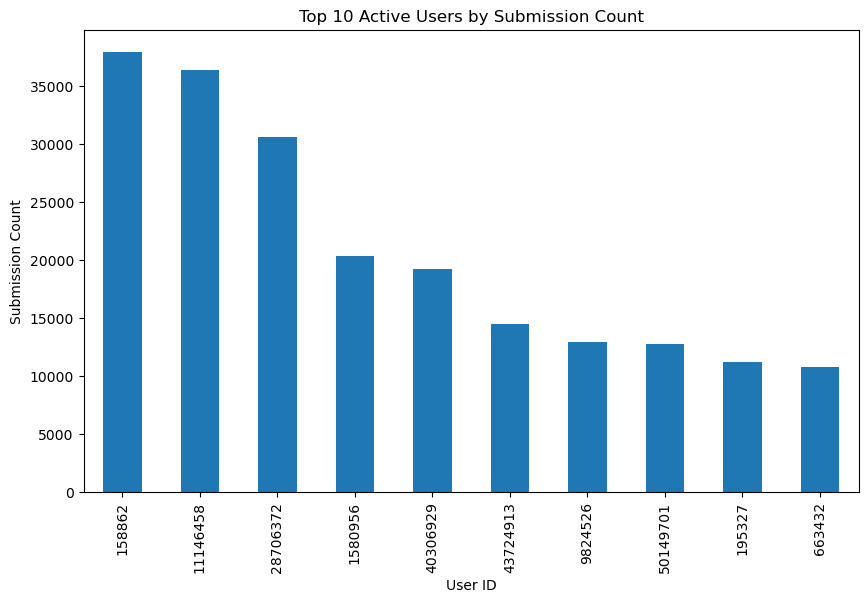

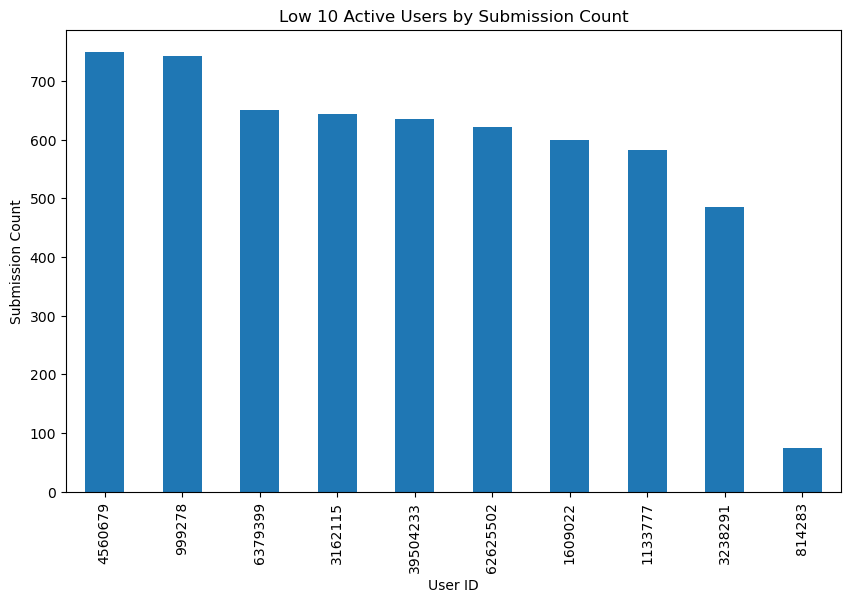

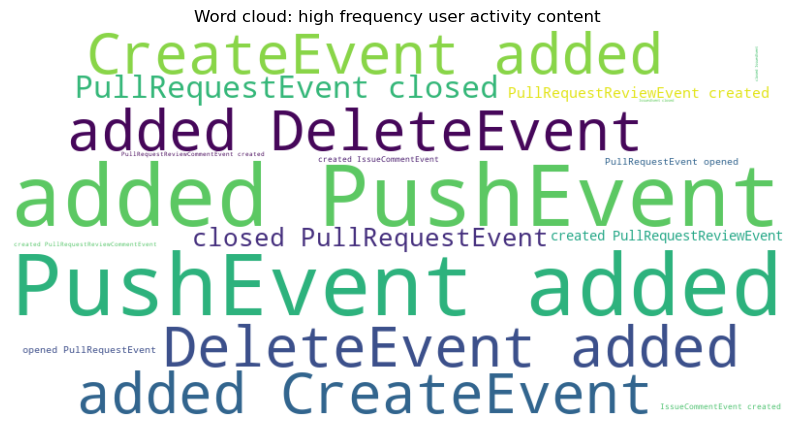

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

data = pd.read_csv('C:/Users/32535/Desktop/data.csv')

# 统计每个用户的提交频率
submission_freq = data['user_id'].value_counts()

# 输出高/低活跃用户的前10名
top_active_users = submission_freq.head(10)
low_active_users = submission_freq.tail(10)
print("高活跃用户：")
print(top_active_users)
print("低活跃用户：")
print(low_active_users)

# 可视化高/低活跃用户提交频率
top_active_users.plot(kind='bar', title='Top 10 Active Users by Submission Count', figsize=(10, 6))
plt.ylabel('Submission Count')
plt.xlabel('User ID')
plt.show()

low_active_users.plot(kind='bar', title='Low 10 Active Users by Submission Count', figsize=(10, 6))
plt.ylabel('Submission Count')
plt.xlabel('User ID')
plt.show()

# 获取高活跃用户的所有提交记录（你可以根据实际情况修改筛选条件）
active_users_data = data[data['user_id'].isin(top_active_users.index)]

# 假设活动内容在'event_type'和'event_action'列中，合并为一个文本字段
text_data = " ".join(active_users_data['event_type'].fillna('') + " " + active_users_data['event_action'].fillna(''))

# 生成高活跃用户词云(个人感觉低活跃用户没有必要，所以不生成相应词云了）
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word cloud: high frequency user activity content')
plt.show()


C:\Users\32535\AppData\Local\Temp\ipykernel_29624\591794983.py:29: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



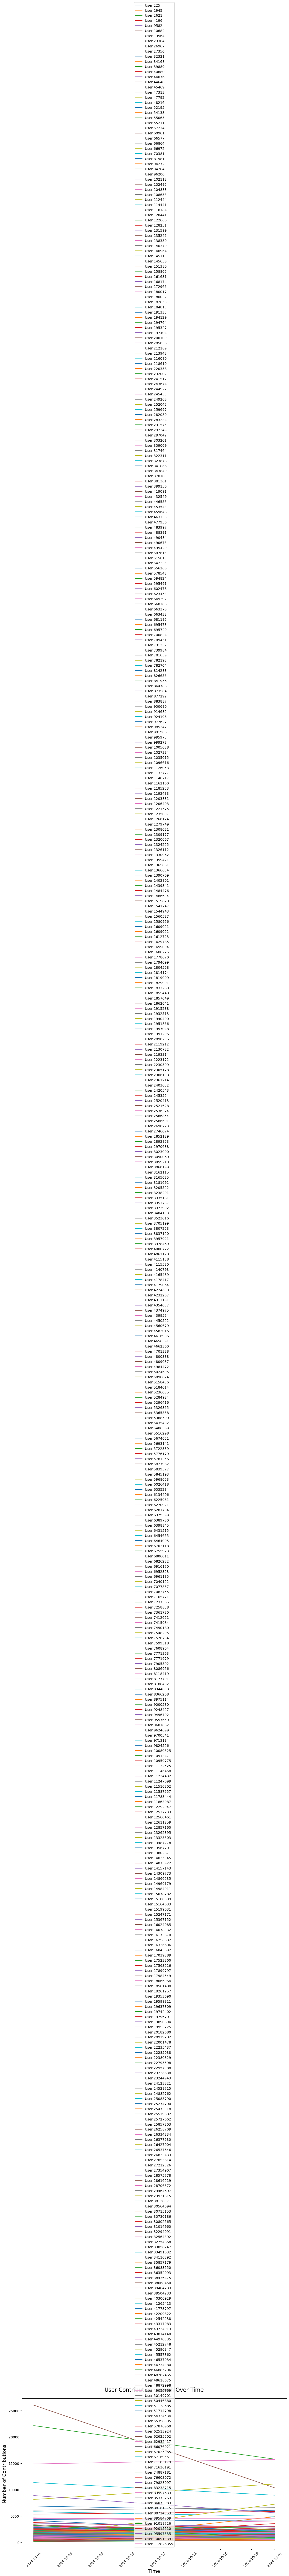

C:\Users\32535\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\32535\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



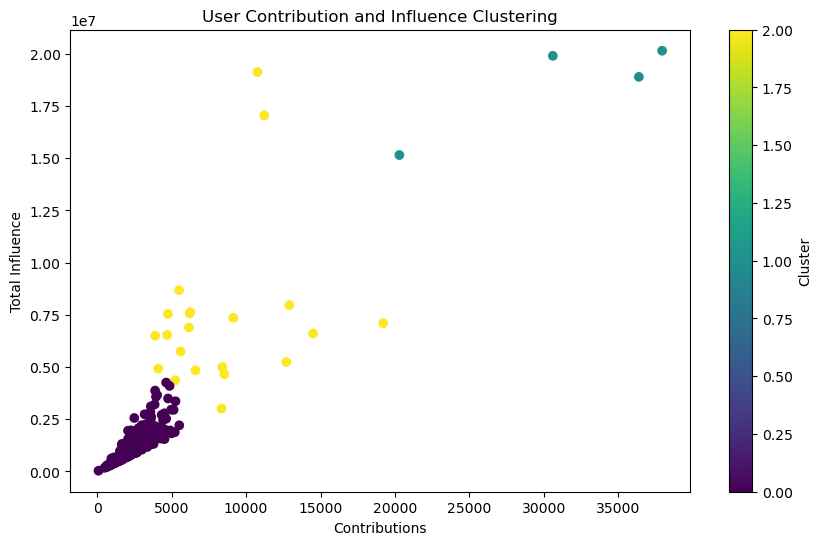

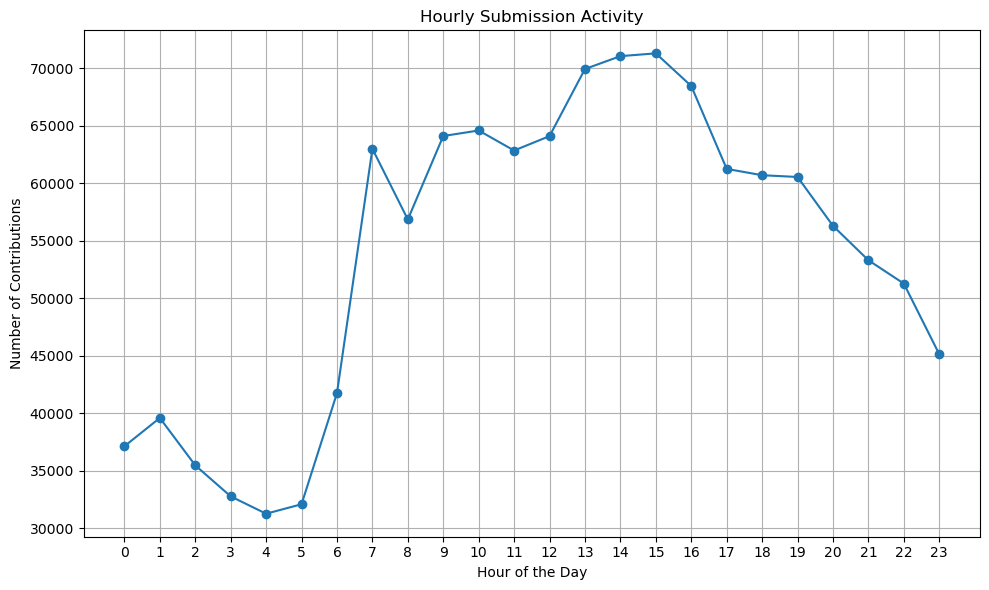

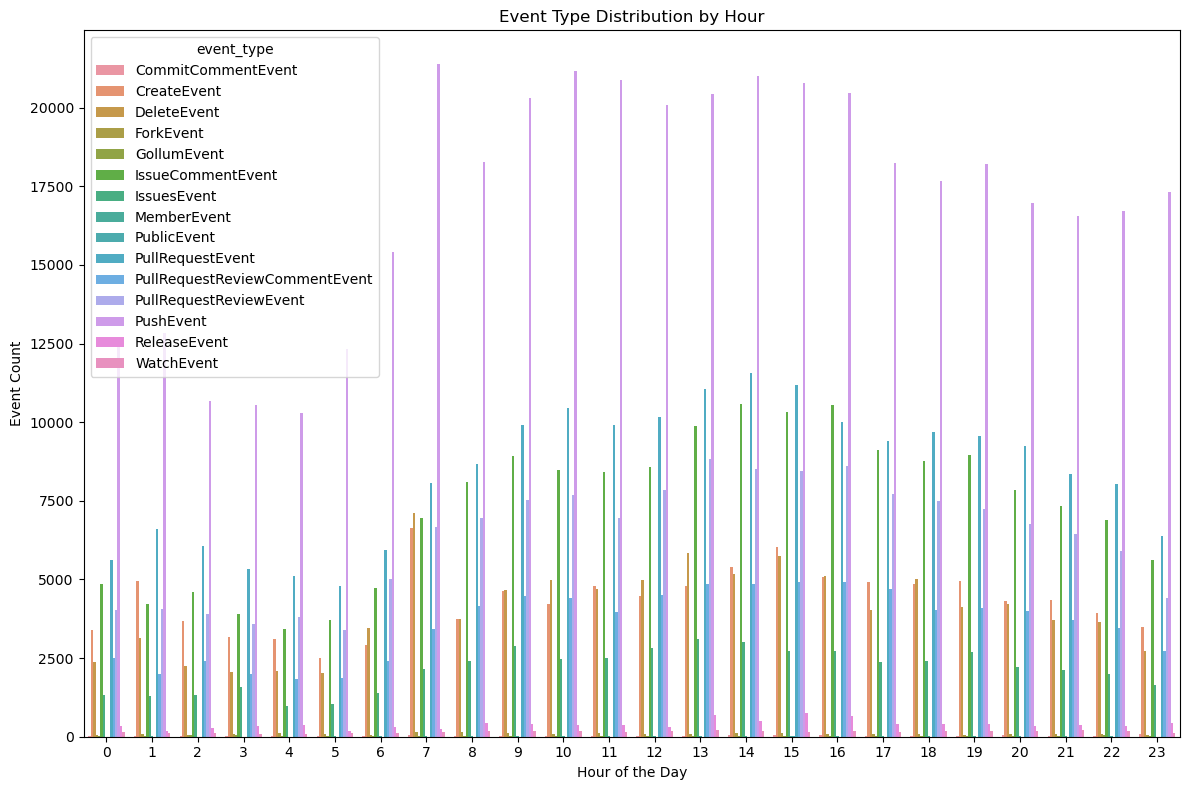

In [15]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

file_path = "C:/Users/32535/Desktop/data.csv"
df = pd.read_csv(file_path)

df['event_time'] = pd.to_datetime(df['event_time']).dt.tz_localize(None)
df['hour'] = df['event_time'].dt.hour

# 用户成长分析
def user_growth_analysis(df):
    # 按用户和时间分组，统计每个用户每月的贡献数量
    user_contributions = df.groupby([df['user_id'], df['event_time'].dt.to_period('M')]).size().reset_index(name='contributions')
    
    # 绘制每个用户随时间的贡献数量变化
    plt.figure(figsize=(14, 8))
    for user_id in user_contributions['user_id'].unique():
        user_data = user_contributions[user_contributions['user_id'] == user_id]
        plt.plot(user_data['event_time'].dt.to_timestamp(), user_data['contributions'], label=f'User {user_id}')

    plt.title("User Contribution Growth Over Time",fontsize=16, pad=20)
    plt.xlabel("Time",fontsize=14)
    plt.ylabel("Number of Contributions",fontsize=14)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# 贡献集群分析：聚类用户贡献频率与影响力
def contribution_clustering(df):
    # 计算每个用户的贡献频率和总影响力
    user_stats = df.groupby('user_id').agg(
        contributions=('event_action', 'count'),
        total_influence=('total_influence', 'sum')
    ).reset_index()

    scaler = StandardScaler()
    user_stats_scaled = scaler.fit_transform(user_stats[['contributions', 'total_influence']])

    # 使用KMeans进行聚类
    kmeans = KMeans(n_clusters=3, random_state=42)
    user_stats['cluster'] = kmeans.fit_predict(user_stats_scaled)

    # 显示聚类结果
    plt.figure(figsize=(10, 6))
    plt.scatter(user_stats['contributions'], user_stats['total_influence'], c=user_stats['cluster'], cmap='viridis')
    plt.xlabel('Contributions')
    plt.ylabel('Total Influence')
    plt.title('User Contribution and Influence Clustering')
    plt.colorbar(label='Cluster')
    plt.show()

# 事件时间分析:高频提交时间段
def event_time_analysis(df):
    # 按小时统计提交次数
    hourly_activity = df.groupby('hour').size().reset_index(name='contributions')

    # 绘制提交量随小时变化的图表
    plt.figure(figsize=(10, 6))
    plt.plot(hourly_activity['hour'], hourly_activity['contributions'], marker='o')
    plt.title('Hourly Submission Activity')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Contributions')
    plt.xticks(range(24))
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 时区与事件类型关联:统计不同时区的事件类型分布
    timezone_event_type = df.groupby([df['hour'], 'event_type']).size().reset_index(name='count')

    # 可视化分析结果
    plt.figure(figsize=(12, 8))
    sns.barplot(x='hour', y='count', hue='event_type', data=timezone_event_type)
    plt.title('Event Type Distribution by Hour')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Event Count')
    plt.tight_layout()
    plt.show()

# 调用分析函数
user_growth_analysis(df)
contribution_clustering(df)
event_time_analysis(df)
